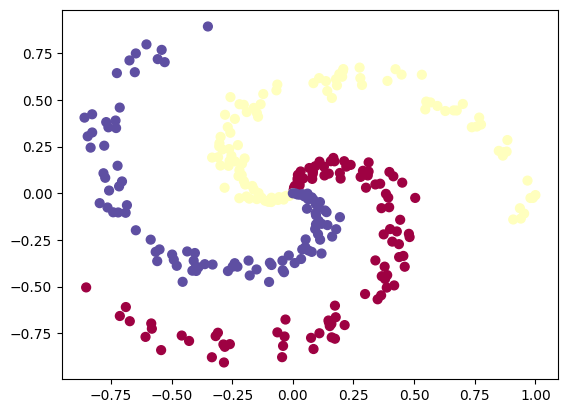

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DenseLayer import DenseLayer
from ActivationFunc import SoftmaxCategoricalCrossEntropy, ReLU, Softmax
from Accuracy import Accuracy



# https://cs231n.github.io/neural-networks-case-study/
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [2]:
dense1 = DenseLayer(2, 3)
activation1 = ReLU()
dense2 = DenseLayer(3, 3)
activation2_loss = SoftmaxCategoricalCrossEntropy()
accuracy = Accuracy()

dense1.forward(X)

dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.04024325e-04,  2.57569491e-04,  1.01873994e-05],
       [-2.08218868e-04,  5.02853132e-04,  1.10000970e-05],
       [-3.12026026e-04,  7.44009560e-04,  9.43351810e-06],
       [-4.16494351e-04,  1.01159596e-03,  2.62549291e-05]])

In [3]:
activation1.forward(dense1.output)

activation1.output[:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.57569491e-04, 1.01873994e-05],
       [0.00000000e+00, 5.02853132e-04, 1.10000970e-05],
       [0.00000000e+00, 7.44009560e-04, 9.43351810e-06],
       [0.00000000e+00, 1.01159596e-03, 2.62549291e-05]])

In [4]:
dense2.forward(activation1.output)

dense2.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.05859077e-06, -4.88009957e-06,  2.05591411e-07],
       [ 3.99578715e-06, -9.50632262e-06,  4.75527044e-07],
       [ 5.89421305e-06, -1.40490881e-05,  7.60654680e-07],
       [ 8.04914455e-06, -1.91337825e-05,  9.22205212e-07]])

In [5]:
loss = activation2_loss.forward(dense2.output, y)

activation2_loss.output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333431, 0.333332  , 0.33333369],
       [0.33333522, 0.33333072, 0.33333405],
       [0.33333612, 0.33332947, 0.33333441],
       [0.33333715, 0.33332808, 0.33333477]])

In [6]:
loss

np.float64(1.0986473102738699)

In [7]:
accuracy.calculate(y, activation2_loss.output)

np.float64(0.2866666666666667)

In [8]:
activation2_loss.backward(activation2_loss.output, y)
dense2.backward(activation2_loss.derivative_inputs)
activation1.backward(dense2.derivative_inputs)
dense1.backward(activation1.derivative_inputs)

In [9]:
print(dense1.derivative_biases,
      dense1.derivative_weights,
      dense2.derivative_biases,
      dense2.derivative_weights)

[[ 0.00054436  0.0012865  -0.00076571]] [[-0.00016635  0.00061161 -0.00030082]
 [-0.00011412  0.00118751  0.00014627]] [[ 1.70832493e-05 -1.85835110e-05  1.50026168e-06]] [[-4.87935809e-04  5.74777280e-04 -8.68414704e-05]
 [ 5.48467311e-04 -1.61391529e-03  1.06544798e-03]
 [-1.27839621e-04 -1.73835294e-04  3.01674915e-04]]
